## **An Exploratory Analysis of DC and Marvel Characters**

In [381]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [382]:
data = pd.read_csv('comic.csv')

In [383]:
data.rename(columns = {'ALIGN':'Character'}, inplace = True)
data.head()

,Unnamed: 0,page_id,name,urlslug,ID,Character,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,company
0,0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0,dc
1,1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0,dc
2,2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0,dc
3,3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0,dc
4,4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0,dc


In [384]:
# Count missing values as a percentage

print(data.isnull().sum() / len(data) * 100)

Unnamed: 0           0.000000
page_id              0.000000
name                 0.000000
urlslug              0.000000
ID                  24.849605
Character           14.665693
EYE                 57.558439
HAIR                28.093847
SEX                  4.206772
GSM                 99.338261
ALIVE                0.025782
APPEARANCES          6.234960
FIRST APPEARANCE     3.798556
YEAR                 3.798556
company              0.000000
dtype: float64


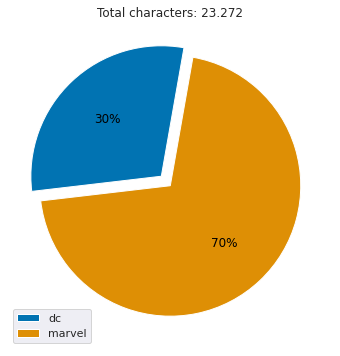

In [385]:
no_of_characters_per_company = data.groupby('company')['name'].nunique()


colors = sns.color_palette('colorblind')

fig, ax = plt.subplots(figsize = (10, 6))

ax.pie(no_of_characters_per_company, colors = colors, autopct='%.0f%%', textprops=dict(color="black"), explode = [0.1, 0], startangle= 80)
plt.title('Total characters: 23.272')
plt.legend(['dc', 'marvel'], loc = 'lower left')

plt.show()

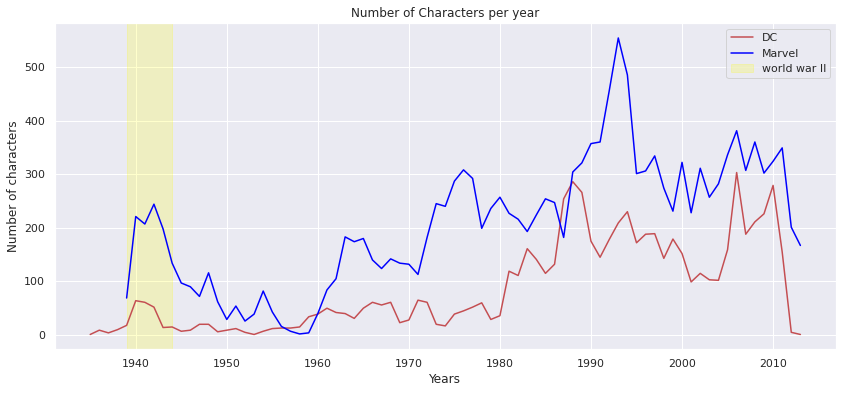

In [386]:
yearly = data.groupby(['YEAR', 'company'], as_index = False)['name'].nunique()
dc = yearly.query('company == "dc"')
marvel = yearly.query('company == "marvel"')

sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize = (14, 6))

ax.plot(dc.YEAR, dc.name, color = 'r', label = 'DC')
ax.plot(marvel.YEAR, marvel.name, color = 'blue', label = 'Marvel')
ax.axvspan(1939, 1944, color='yellow', alpha=0.2, label = 'world war II')


plt.ylabel('Number of characters')
plt.xlabel('Years')
plt.title('Number of Characters per year')
plt.legend()
plt.show()

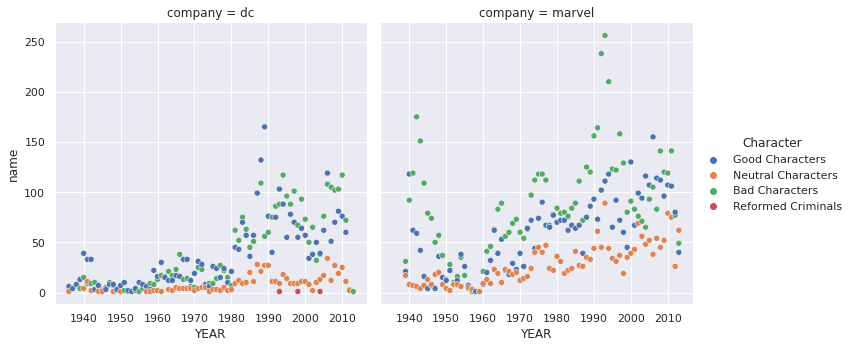

In [387]:
characters = data.groupby(['YEAR', 'company', 'Character'], as_index = False )['name'].nunique()

g = sns.relplot(x = 'YEAR', y = 'name', data = characters, kind = 'scatter', hue = 'Character', col = 'company')
plt.show()

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

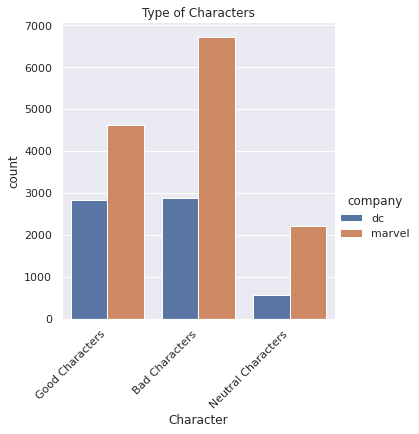

In [388]:
data = data[data.Character != 'Reformed Criminals']

g = sns.catplot(x = 'Character', data = data, kind = 'count', hue = 'company')
g.set( title="Type of Characters")
plt.xticks(rotation = 45, ha="right")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



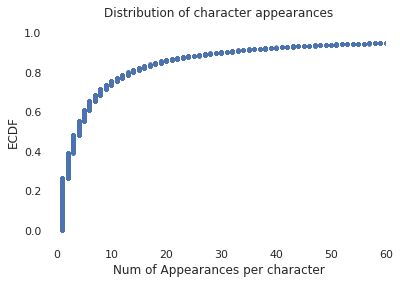


Appearances per character: 
mean = 19.007837565313043
median = 4.0
max = 4043.0


In [389]:
df = data.copy()
df.dropna(subset = ['APPEARANCES'], inplace = True)

def ecdf(data):
  n= len(data)
  x = np.sort(data)
  y = np.arange(1, n+1) / n
  return x, y

x, y = ecdf(df.APPEARANCES)

plt.plot(x, y, marker = '.', linestyle = 'None')
plt.xlabel('Num of Appearances per character')
plt.ylabel('ECDF')
plt.title('Distribution of character appearances')
plt.xlim([-1, 60])

ax = plt.axes()
ax.set_facecolor("white")

plt.show()

print('''
Appearances per character: 
mean = {}
median = {}
max = {}'''.format(np.mean(df.APPEARANCES), np.median(df.APPEARANCES), np.max(df.APPEARANCES)))

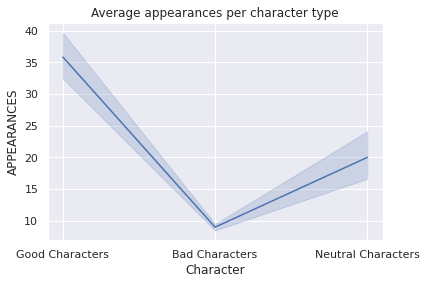

In [390]:
g = sns.lineplot(x = 'Character', y = 'APPEARANCES', data = data)
g.set(title = 'Average appearances per character type')
plt.show()

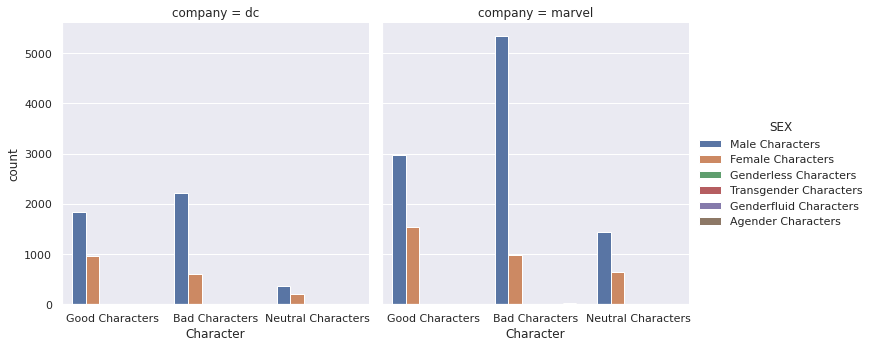

In [391]:
sns.catplot(x = 'Character', data = data, kind = 'count', hue = 'SEX', col = 'company')
plt.show()


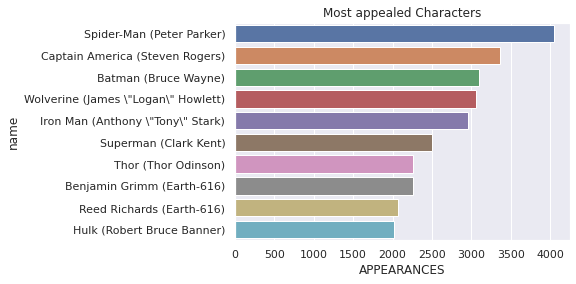

In [392]:
df = data.sort_values(by = 'APPEARANCES', ascending = False)

sns.barplot(y = 'name', x = 'APPEARANCES', data = df[:10])
plt.title('Most appealed Characters')
plt.show()

Text(0.5, 1.0, 'Top 10 Bad Characters')

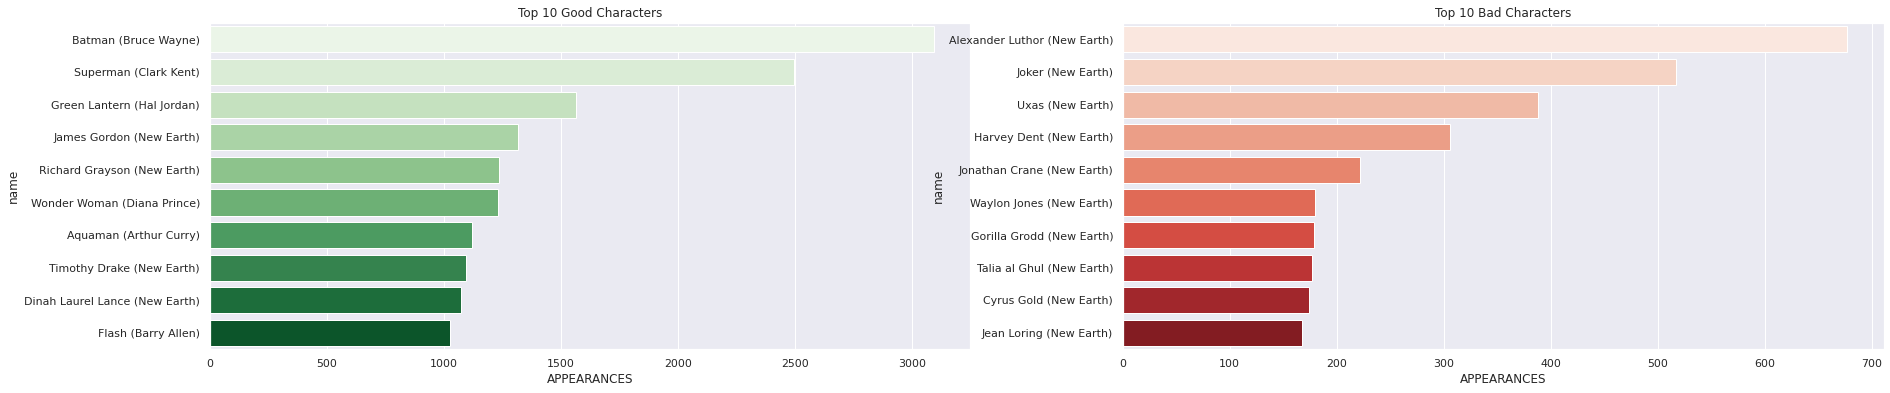

In [393]:
fig, ax = plt.subplots(1, 2, figsize = (30,6))

g = sns.barplot(data = data[data["Character"] == "Good Characters"][["name", "APPEARANCES"]][:10], y = 'name', x = 'APPEARANCES', palette = 'Greens', ax = ax[0])
ax[0].set_title("Top 10 Good Characters")
g = sns.barplot(data = data[data["Character"] == "Bad Characters"][["name", "APPEARANCES"]][:10], y = 'name', x = 'APPEARANCES', palette = 'Reds', ax = ax[1])
ax[1].set_title("Top 10 Bad Characters")

In [395]:
gender_classification = data.SEX.value_counts().reset_index().rename(columns = {"index": "gender", "SEX": "count"})

tp = px.pie(gender_classification, values = 'count', names='gender', color_discrete_sequence=px.colors.sequential.Plasma)


tp.update_traces(hoverinfo='label+percent', textinfo='value+percent')

tp.update_layout(title="Gender classification",title_x=0.5)
tp.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



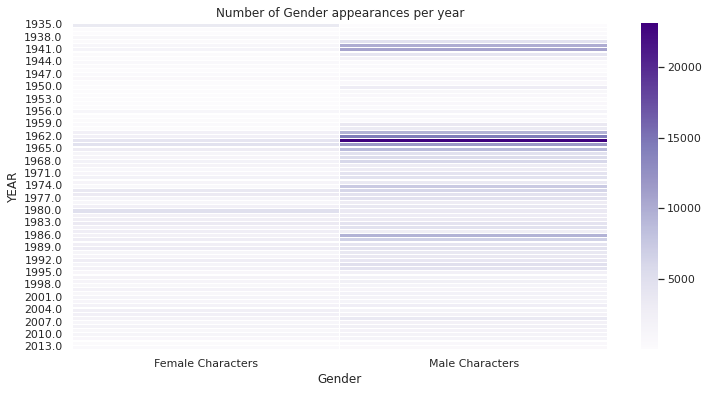

In [396]:
genders = data[data.SEX.isin(['Male Characters', 'Female Characters'])]
genders.rename(columns = {'SEX': 'Gender'}, inplace = True)

fig, ax = plt.subplots(figsize = (12, 6))
g = sns.heatmap(pd.crosstab(genders.YEAR, genders.Gender, values = genders.APPEARANCES, aggfunc = 'sum'), cmap = 'Purples', linewidths = .1 )
plt.title('Number of Gender appearances per year')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



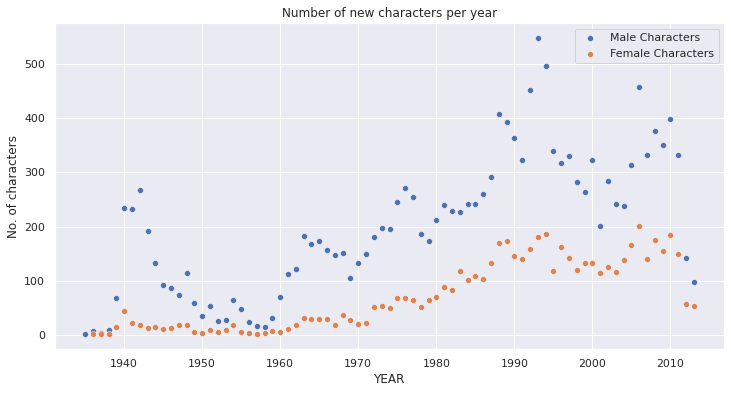

In [397]:
fig, ax = plt.subplots(figsize = (12, 6))
for i in ['Male Characters', 'Female Characters']:
  df = data[data.SEX == i]
  df_grouped = pd.DataFrame(df.groupby('YEAR')['name'].nunique())
  sns.scatterplot(df_grouped.index, df_grouped.name, label = i)
  

plt.legend()
plt.title('Number of new characters per year')
plt.ylabel('No. of characters')
plt.show()

In [398]:
genders = data[data.SEX.isin(['Male Characters', 'Female Characters'])]
gender = pd.DataFrame(pd.crosstab(genders.YEAR, genders.SEX, values = genders['name'], aggfunc = 'nunique'))
gender['total'] = gender.sum(axis = 1)
gender['male %'] = gender['Male Characters'] / gender.total
gender['female %'] = gender['Female Characters'] / gender.total
gender['difference'] = gender['male %'] - gender['female %'] 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



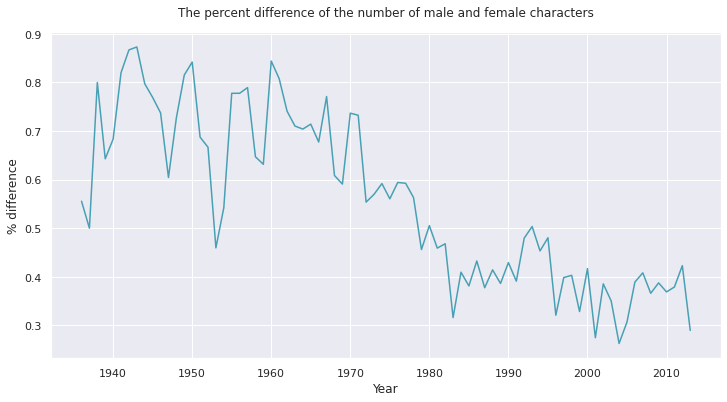

In [399]:
fig = plt.gcf()
fig.set_size_inches(12, 6)

sns.set_style('darkgrid')
sns.set_palette("Spectral_r")
g = sns.lineplot(gender.index, gender.difference)
g.set_title('The percent difference of the number of male and female characters',  y = 1.03)
g.set(ylabel = '% difference', xlabel = 'Year')
plt.show()

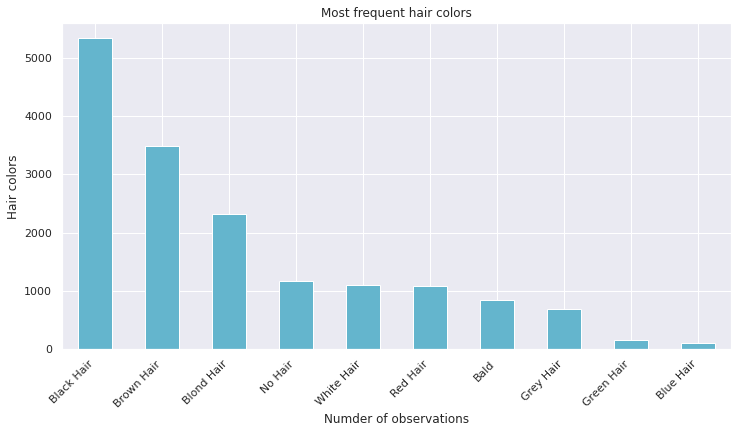

In [400]:
hair = data.groupby('HAIR')['name'].count().sort_values()[-10:]

fig, ax = plt.subplots(figsize = (12, 6))
hair.sort_values(ascending = False).plot(kind = 'bar', color = 'c')
plt.title('Most frequent hair colors')
plt.xlabel('Numder of observations')
plt.ylabel('Hair colors')
plt.xticks(rotation = 45, ha="right")
plt.show()

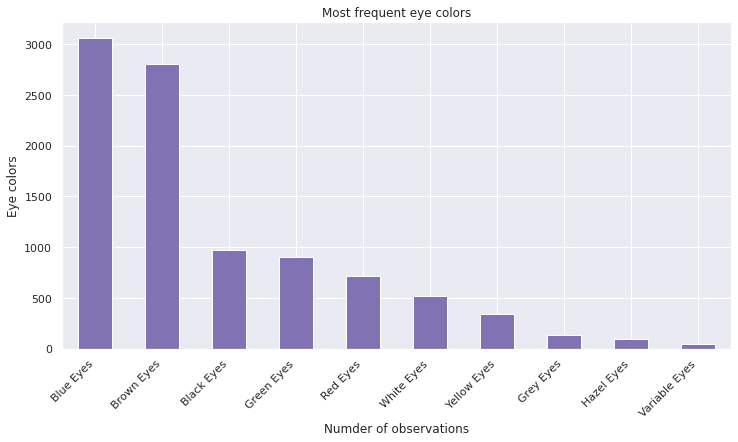

In [401]:
eyes = data.groupby('EYE')['name'].count().sort_values()[-10:]

fig, ax = plt.subplots(figsize = (12, 6))
eyes.sort_values(ascending = False).plot(kind = 'bar', color = 'm')
plt.title('Most frequent eye colors')
plt.xlabel('Numder of observations')
plt.ylabel('Eye colors')
plt.xticks(rotation = 45, ha="right")
plt.show()

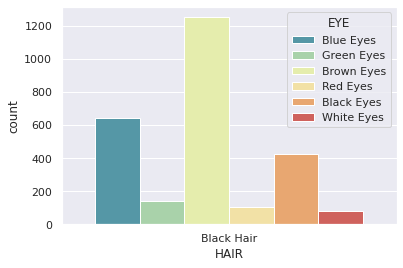

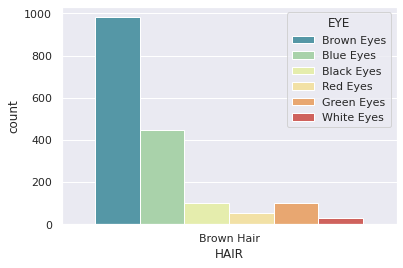

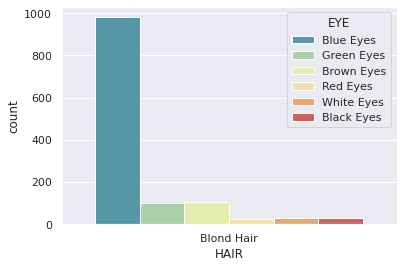

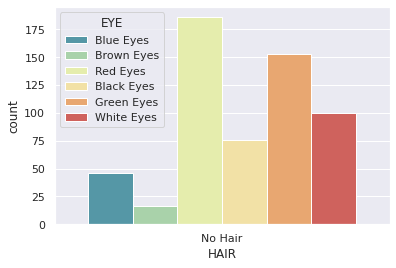

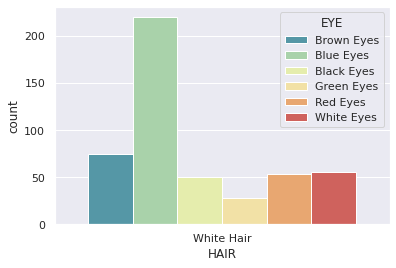

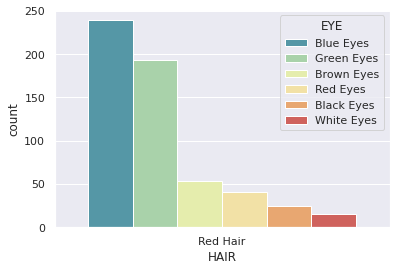

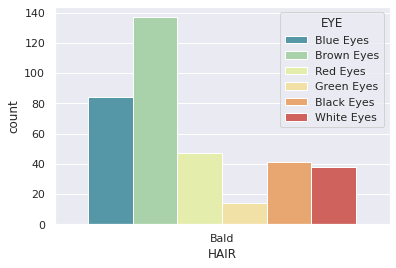

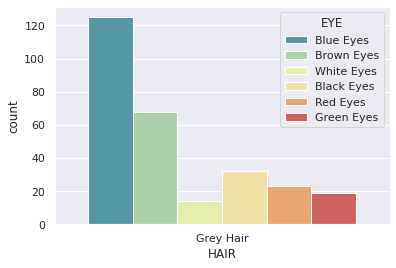

In [402]:
hairs = ['Black Hair', 'Brown Hair', 'Blond Hair', 'No Hair', 'White Hair', 'Red Hair', 'Bald', 'Grey Hair']
eyes = ['Blue Eyes', 'Brown Eyes', 'Black Eyes', 'Green Eyes', 'Green Eyes', 'Red Eyes', 'White Eyes']
filt_data = data[data.EYE.isin(eyes)]

for i in hairs:
  hair = filt_data[filt_data.HAIR == i]
  sns.countplot(x = 'HAIR', data = hair, hue = 'EYE')
  plt.show()

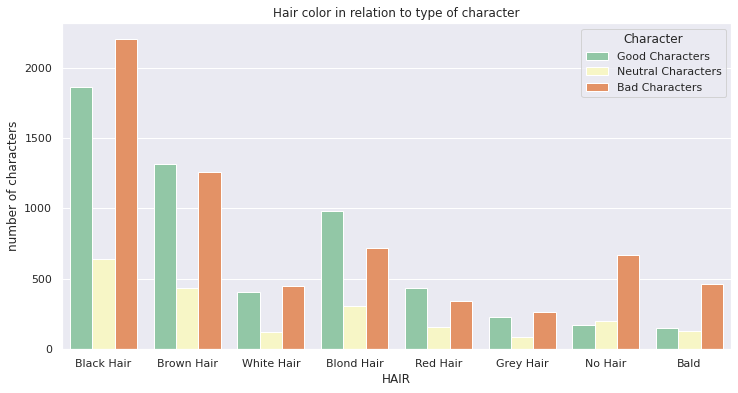

In [403]:
fig, ax = plt.subplots(figsize = (12, 6))
g = sns.countplot(x = 'HAIR', data= data[data.HAIR.isin(hairs)], hue = 'Character', palette = 'Spectral_r')
g.set_title('Hair color in relation to type of character')
g.set(ylabel = 'number of characters')
plt.show()

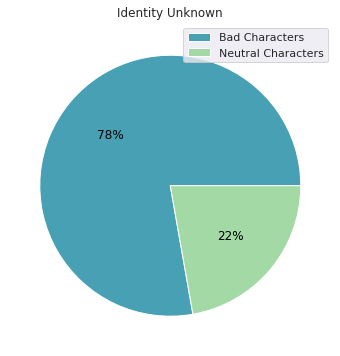

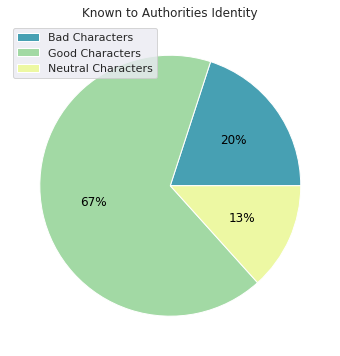

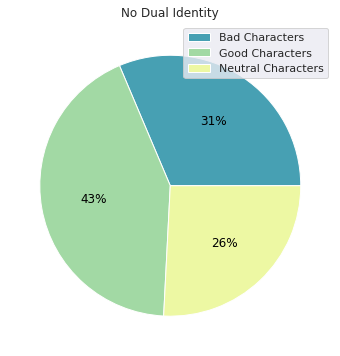

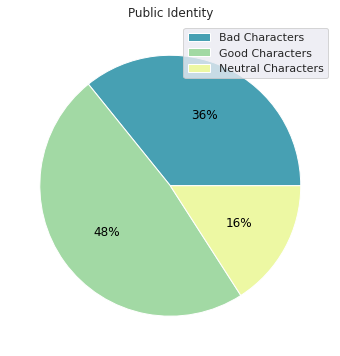

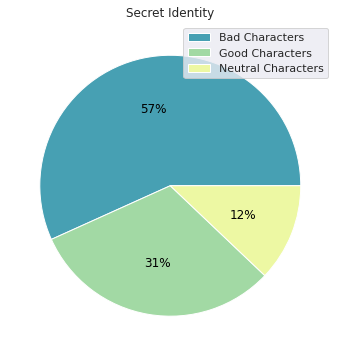

In [405]:
grouped_data = data.groupby(['ID', 'Character'], as_index = False)['name'].nunique()


for i in grouped_data.ID.unique():
  df = grouped_data[grouped_data.ID == i]
  df.set_index('Character', inplace= True)
  fig, ax = plt.subplots(figsize = (12, 6))
  plt.pie(df['name'], autopct='%.0f%%', textprops=dict(color="black"))
  plt.title(i)
  plt.legend(df.index)
  plt.show()